In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

In [3]:
target.value_counts()

Class
not donated    570
donated        178
Name: count, dtype: int64

In [6]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

dummy_model = DummyClassifier(strategy="most_frequent")

cross_validate(
    dummy_model,
    data,
    target,
    scoring='balanced_accuracy',
    cv=10
)


{'fit_time': array([0.00235248, 0.00100183, 0.00110149, 0.00092435, 0.0009017 ,
        0.0009234 , 0.00093937, 0.00093102, 0.00101876, 0.00091004]),
 'score_time': array([0.00218868, 0.00162292, 0.00149608, 0.00149131, 0.00138092,
        0.00137496, 0.00168419, 0.00150514, 0.00144577, 0.001369  ]),
 'test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])}

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=1)
)

In [15]:
cv_results = cross_validate(
    model,
    data,
    target,
    return_train_score=True,
    n_jobs=2,
    scoring='balanced_accuracy',
    cv=10
)

cv_results = pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_score,train_score
0,0.005531,0.008919,0.513158,0.897509
1,0.010987,0.009534,0.491228,0.885953
2,0.005015,0.008291,0.587719,0.879904
3,0.005657,0.014796,0.271930,0.882828
4,0.005153,0.008858,0.385965,0.893579
5,0.004851,0.008413,0.438596,0.874488
6,0.005353,0.008183,0.564327,0.881884
7,0.005142,0.008222,0.662281,0.867434
8,0.004819,0.008138,0.421569,0.878501
9,0.004508,0.007288,0.503096,0.883440


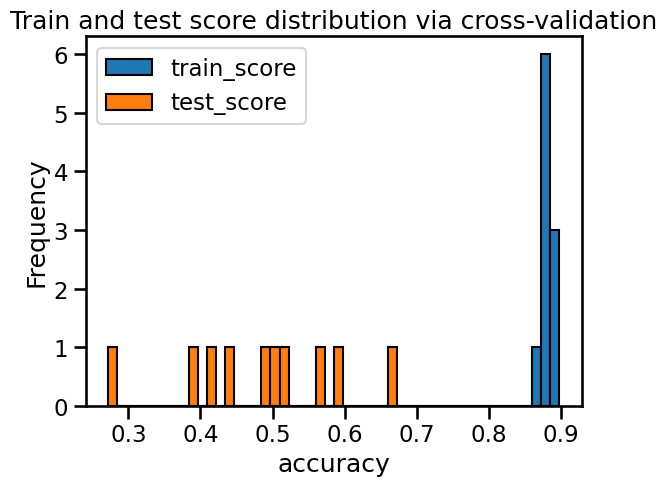

In [16]:
import matplotlib.pyplot as plt

cv_results[["train_score", "test_score"]].plot.hist(bins=50, edgecolor="black")
plt.xlabel("accuracy")
_ = plt.title("Train and test score distribution via cross-validation")


In [18]:
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=1),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 1,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

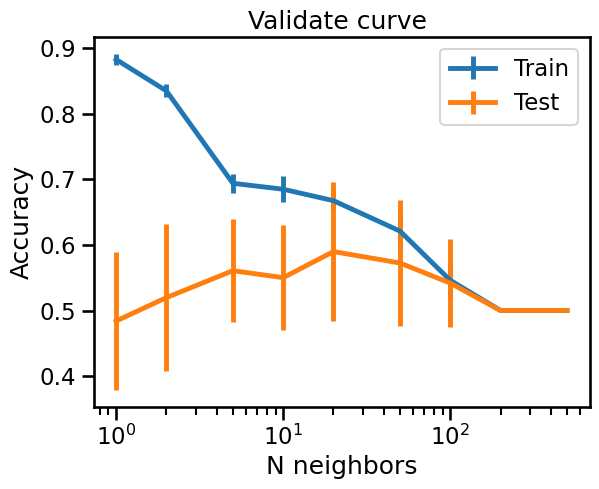

In [21]:

import numpy as np
param_range = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500])

from sklearn.model_selection import ValidationCurveDisplay

import numpy as np
param_range = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500])

disp = ValidationCurveDisplay.from_estimator(
    model,
    data,
    target,
    param_name="kneighborsclassifier__n_neighbors",
    param_range=param_range,
    cv=10,
    scoring="balanced_accuracy",
    negate_score=False,
    std_display_style="errorbar",
    n_jobs=2,
)
_ = disp.ax_.set(
    xlabel="N neighbors",
    ylabel="Accuracy",
    title="Validate curve ",
)


In [ ]:

from sklearn.model_selection import LearningCurveDisplay

display = LearningCurveDisplay.from_estimator(
    model,
    data,
    target,
    train_sizes=train_sizes,
    cv=cv,
    score_type="both",  # both train and test errors
    scoring="neg_mean_absolute_error",
    negate_score=True,  # to use when metric starts with "neg_"
    score_name="Mean absolute error (k$)",
    std_display_style="errorbar",
    n_jobs=2,
)
_ = display.ax_.set(xscale="log", title="Learning curve for decision tree")